In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Downloading data fom yahoo finance

In [2]:
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)
stock = "XRP-USD" 
xrp_data = yf.download(stock, start, end)
xrp_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.217911,0.221791,0.214866,0.217488,0.217488,147916992
2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000
...,...,...,...,...,...,...
2024-03-22,0.640695,0.644345,0.600405,0.610949,0.610949,2053036282
2024-03-23,0.610948,0.632407,0.605780,0.617596,0.617596,1160450696
2024-03-24,0.617608,0.635601,0.614912,0.632950,0.632950,1230486578


In [3]:
xrp_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2.330000e+03
mean,0.524240,0.545064,0.501979,0.524434,0.524434,2.360818e+09
std,0.330104,0.357316,0.303446,0.330041,0.330041,3.330258e+09
min,0.140524,0.146911,0.115093,0.139635,0.139635,1.002940e+08
25%,0.304655,0.312861,0.298101,0.304787,0.304787,8.529704e+08
50%,0.448210,0.461996,0.430009,0.448453,0.448453,1.403293e+09
75%,0.627186,0.646264,0.608581,0.627172,0.627172,2.411174e+09
max,3.363570,3.841940,3.117340,3.377810,3.377810,3.695518e+10


In [4]:
xrp_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2330 entries, 2017-11-09 to 2024-03-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2330 non-null   float64
 1   High       2330 non-null   float64
 2   Low        2330 non-null   float64
 3   Close      2330 non-null   float64
 4   Adj Close  2330 non-null   float64
 5   Volume     2330 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 127.4 KB


In [5]:
xrp_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
xrp_data.columns = xrp_data.columns.str.lower()

Closing price data

In [7]:
closing_price = xrp_data[['close']]
closing_price

,close
Date,
2017-11-09,0.217488
2017-11-10,0.206483
2017-11-11,0.210430
2017-11-12,0.197339
2017-11-13,0.203442
...,...
2024-03-22,0.610949
2024-03-23,0.617596
2024-03-24,0.632950


<Axes: xlabel='Date'>

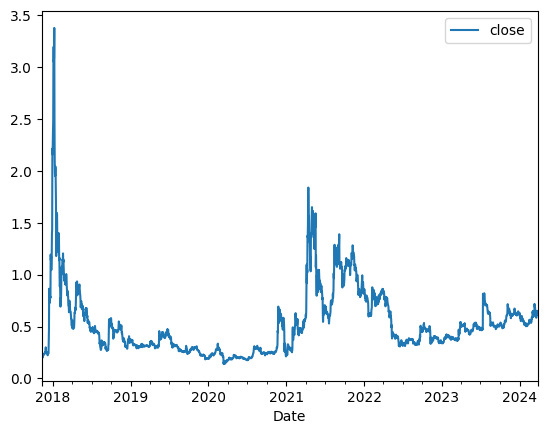

In [8]:
closing_price.plot()

Text(0.5, 1.0, 'closing price of xrp')

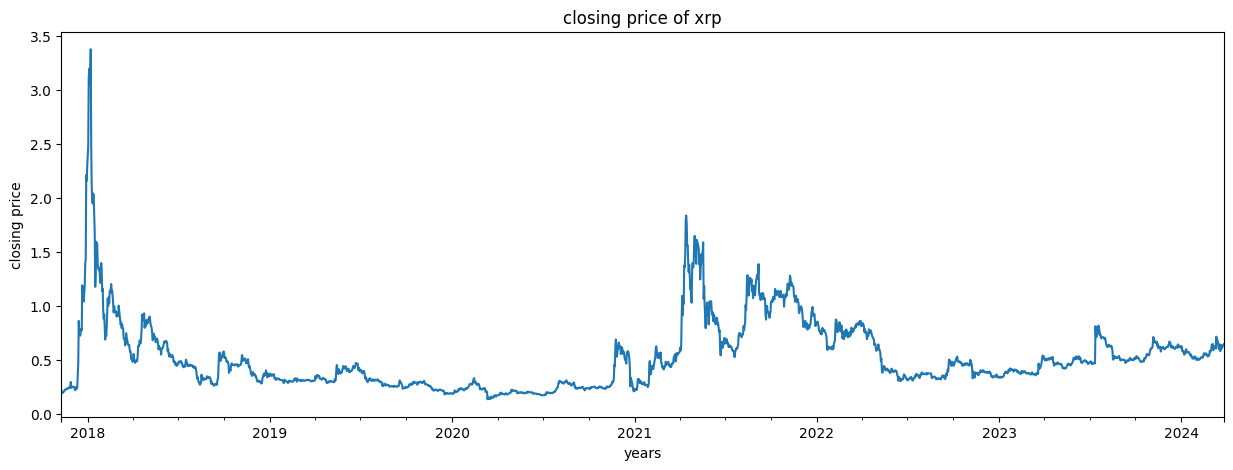

In [9]:
plt.figure(figsize=(15, 5))
closing_price['close'].plot()
plt.xlabel('years')
plt.ylabel('closing price')
plt.title('closing price of xrp')

In [10]:
for i in range(2014,2024):
    print(list(closing_price.index.year).count(i))

0
0
0
53
365
365
366
365
365
365


Monthly average cloding prices for the Ripple cryptocurrency.

In [11]:
closing_price['month_average_365_days'] = closing_price['close'].rolling(window=365).mean()
closing_price['month_average_365_days'].head()

C:\Users\aivi1\AppData\Local\Temp\ipykernel_20736\2660627513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['month_average_365_days'] = closing_price['close'].rolling(window=365).mean()


Date
2017-11-09   NaN
2017-11-10   NaN
2017-11-11   NaN
2017-11-12   NaN
2017-11-13   NaN
Name: month_average_365_days, dtype: float64

Text(0.5, 1.0, 'closing price of xrp')

<Figure size 640x480 with 0 Axes>

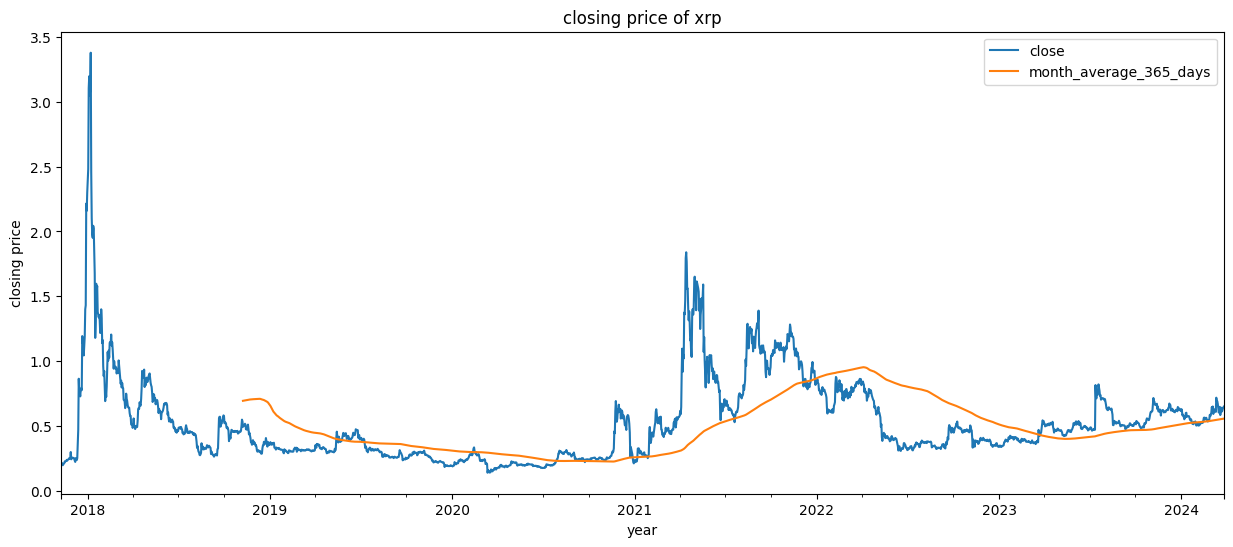

In [12]:
plt.figure()
closing_price[['close', 'month_average_365_days']].plot(figsize=(15, 6))
plt.xlabel('year')
plt.ylabel('closing price')
plt.title('closing price of xrp')

Monthle closing prices for 100 days

C:\Users\aivi1\AppData\Local\Temp\ipykernel_20736\912477157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['month_average_100_days'] = closing_price['close'].rolling(window=100).mean()


Text(0.5, 1.0, 'Closing price of xrp')

<Figure size 640x480 with 0 Axes>

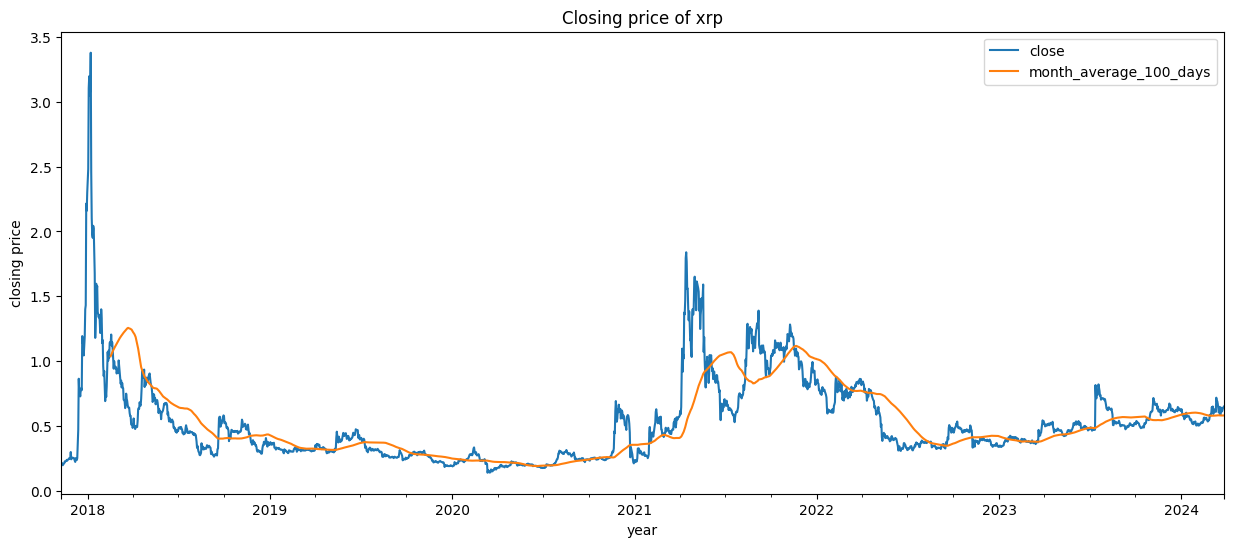

In [13]:
closing_price['month_average_100_days'] = closing_price['close'].rolling(window=100).mean()
closing_price['month_average_100_days'].head()
plt.figure()
closing_price[['close', 'month_average_100_days']].plot(figsize=(15, 6))
plt.xlabel('year')
plt.ylabel('closing price')
plt.title('Closing price of xrp')

ML model

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_price[['close']].values)
scaled_data

array([[0.02404225],
       [0.02064373],
       [0.02186262],
       ...,
       [0.15234353],
       [0.15484   ],
       [0.15729146]])

In [15]:
scaled_data.shape

(2330, 1)

In [16]:
x_data = []
y_data = []

base_days = 100

for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)
x_data[0], y_data[0]

(array([[0.02404225],
        [0.02064373],
        [0.02186262],
        [0.01781991],
        [0.01970462],
        [0.02167579],
        [0.02264269],
        [0.02701275],
        [0.02685031],
        [0.02748215],
        [0.02821991],
        [0.03061107],
        [0.02891629],
        [0.03064195],
        [0.03173609],
        [0.03242784],
        [0.03482147],
        [0.03371745],
        [0.03529519],
        [0.04926139],
        [0.03194052],
        [0.03435361],
        [0.03584241],
        [0.03577849],
        [0.03487242],
        [0.03518525],
        [0.0328784 ],
        [0.02869178],
        [0.02568978],
        [0.0347387 ],
        [0.03244822],
        [0.0301707 ],
        [0.03460468],
        [0.0722339 ],
        [0.10235024],
        [0.22377666],
        [0.19039922],
        [0.19115922],
        [0.18180951],
        [0.19726296],
        [0.20123126],
        [0.19650853],
        [0.32531443],
        [0.30839749],
        [0.31953338],
        [0

In [17]:
len_train = int(len(x_data) * 0.9) # 90% data
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2007, 100, 1)
(2007, 1)
(223, 100, 1)
(223, 1)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))

model.add(LSTM(64, return_sequences = False))

model.add(Dense(25))

model.add(Dense(1))

model.summary()

c:\Users\aivi1\ptu20_ml_reinforcement\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, batch_size=5, epochs=10)

Epoch 1/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 2.5236e-05 - loss: 0.0014
Epoch 2/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 3.9649e-04 - loss: 3.2845e-04
Epoch 3/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 2.0215e-04 - loss: 2.3394e-04
Epoch 4/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 3.7509e-04 - loss: 2.2123e-04
Epoch 5/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 1.8579e-04 - loss: 1.7984e-04
Epoch 6/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.0025 - loss: 2.3001e-04
Epoch 7/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.0019 - loss: 2.4041e-04
Epoch 8/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 4.8944e-04 - loss: 1.8754e-04
Epoch 9/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 1.6136e-04 - loss: 2.7393e-04
Epoch 10/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 4.5752e-04 - loss: 1.6563e-04


In [21]:
predictions = model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


array([[0.14799027],
       [0.12378241],
       [0.12031788],
       [0.12430453],
       [0.13103254],
       [0.12789021],
       [0.12645303],
       [0.12891263],
       [0.12599541],
       [0.12778941],
       [0.12724982],
       [0.12722531],
       [0.12701416],
       [0.13178954],
       [0.12901239],
       [0.12350737],
       [0.11905724],
       [0.11879696],
       [0.12060454],
       [0.12191403],
       [0.12128744],
       [0.12058167],
       [0.12095881],
       [0.12102543],
       [0.12074487],
       [0.11896279],
       [0.11198232],
       [0.11282519],
       [0.11396965],
       [0.11583802],
       [0.11942241],
       [0.11964224],
       [0.11763282],
       [0.12020424],
       [0.12370902],
       [0.12621269],
       [0.12238413],
       [0.12325595],
       [0.12209021],
       [0.12027447],
       [0.12091051],
       [0.11997083],
       [0.11925332],
       [0.12204476],
       [0.125993  ],
       [0.12471282],
       [0.12697598],
       [0.123

In [22]:
inverse_predictions = scaler.inverse_transform(predictions)
inverse_predictions

array([[0.6188534 ],
       [0.5404641 ],
       [0.5292454 ],
       [0.54215485],
       [0.5639413 ],
       [0.5537659 ],
       [0.549112  ],
       [0.5570767 ],
       [0.5476302 ],
       [0.5534395 ],
       [0.5516922 ],
       [0.55161285],
       [0.55092907],
       [0.5663926 ],
       [0.5573997 ],
       [0.5395735 ],
       [0.5251632 ],
       [0.52432036],
       [0.53017366],
       [0.534414  ],
       [0.53238493],
       [0.5300996 ],
       [0.5313208 ],
       [0.5315365 ],
       [0.530628  ],
       [0.52485734],
       [0.50225335],
       [0.5049827 ],
       [0.5086887 ],
       [0.5147388 ],
       [0.5263457 ],
       [0.5270575 ],
       [0.52055067],
       [0.5288774 ],
       [0.54022646],
       [0.54833376],
       [0.53593624],
       [0.53875935],
       [0.53498447],
       [0.52910477],
       [0.5311644 ],
       [0.52812153],
       [0.52579814],
       [0.5348373 ],
       [0.5476224 ],
       [0.543477  ],
       [0.55080545],
       [0.541

In [23]:
inverse_y_test = scaler.inverse_transform(y_test)
inverse_predictions[:5], inverse_y_test[:5]

(array([[0.6188534 ],
        [0.5404641 ],
        [0.5292454 ],
        [0.54215485],
        [0.5639413 ]], dtype=float32),
 array([[0.50714201],
        [0.5061    ],
        [0.519629  ],
        [0.53954703],
        [0.52453798]]))

In [24]:
plotting_data = pd.DataFrame({
    'original_test_data': inverse_y_test.reshape(-1),
    'predictions': inverse_predictions.reshape(-1),
},
index = closing_price.index[len_train+100:])

plotting_data

,original_test_data,predictions
Date,,
2023-08-17,0.507142,0.618853
2023-08-18,0.506100,0.540464
2023-08-19,0.519629,0.529245
2023-08-20,0.539547,0.542155
2023-08-21,0.524538,0.563941
...,...,...
2024-03-22,0.610949,0.668063
2024-03-23,0.617596,0.644363
2024-03-24,0.632950,0.647138


Text(0.5, 1.0, 'close price of xrp')

<Figure size 640x480 with 0 Axes>

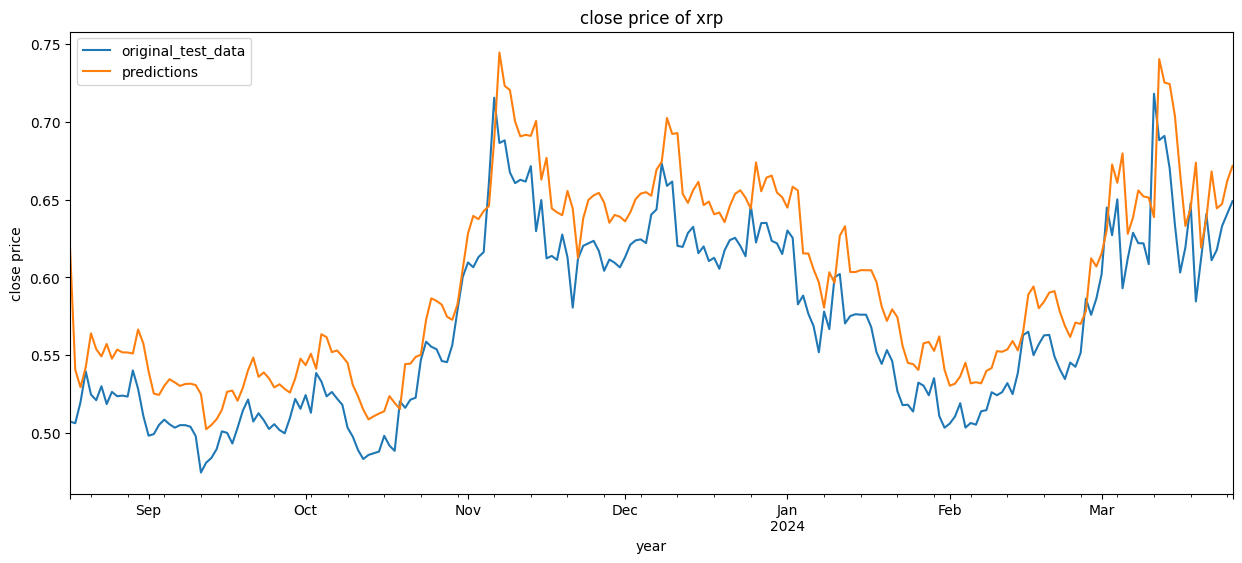

In [25]:
plt.figure()
plotting_data.plot(figsize=(15, 6))
plt.xlabel('year')
plt.ylabel('close price')
plt.title('close price of xrp')

In [26]:
last_100 = closing_price[['close']].tail(100)
last_100.tail()

,close
Date,
2024-03-22,0.610949
2024-03-23,0.617596
2024-03-24,0.632950
2024-03-25,0.641034
2024-03-26,0.648972


In [27]:
last_100 = scaler.fit_transform(last_100['close'].values.reshape(-1,1)).reshape(1, -1, 1)
last_100

array([[[5.08915743e-01],
        [4.75989377e-01],
        [5.31206417e-01],
        [5.61884739e-01],
        [5.68829178e-01],
        [5.44639471e-01],
        [5.13514481e-01],
        [6.66272434e-01],
        [5.54711973e-01],
        [6.12833465e-01],
        [6.13494589e-01],
        [5.59520173e-01],
        [5.52268338e-01],
        [5.20137929e-01],
        [5.90612704e-01],
        [5.68647736e-01],
        [3.69511498e-01],
        [3.95791389e-01],
        [3.41146694e-01],
        [3.04031359e-01],
        [2.25969609e-01],
        [3.47835339e-01],
        [2.95285267e-01],
        [4.50542896e-01],
        [4.60345455e-01],
        [3.12349093e-01],
        [3.34593159e-01],
        [3.39969266e-01],
        [3.38512185e-01],
        [3.38637862e-01],
        [3.01522527e-01],
        [2.26742262e-01],
        [1.91130062e-01],
        [2.32416055e-01],
        [1.99764348e-01],
        [1.09489142e-01],
        [6.76957231e-02],
        [6.88642731e-02],
        [4.8

In [28]:
last_100.shape

(1, 100, 1)

In [29]:
day101 = model.predict(last_100)
day101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.68998206]], dtype=float32)

Tomorrows value

In [30]:
scaler.inverse_transform(day101)

array([[0.6514308]], dtype=float32)

In [32]:
import numpy as np

# Define no_of_days
no_of_days = 10  # Or any other value you want to use

def predict_future(no_of_days, previous_100, model, scaler):
    future_predictions = []
    for i in range(no_of_days):
        # Reshape previous_100 to match the expected input shape of the model
        next_day = model.predict(previous_100.reshape(1, -1, 1)).tolist()
        
        # Update previous_100 for the next prediction
        previous_100 = np.append(previous_100, [[next_day[0]]], axis=1)
        previous_100 = previous_100[:, 1:]  # Drop the first column

        # Inverse transform the predicted value and append to future_predictions
        future_predictions.append(scaler.inverse_transform(np.array([next_day]).reshape(-1, 1)))  # Convert next_day to a 2D array
    return future_predictions

# Assuming you have defined `last_100`, `model`, and `scaler` variables before calling the function

future_results = predict_future(no_of_days, last_100, model, scaler)
print(future_results)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[array([[0.65143082]]), array([[0.65315416]]), array([[0.65425249]]), array([[0.65487528]]), array([[0.65516767]]), array([[0.65525711]]), array([[0.65524646]]), array([[0.65521138]]), array([[0.65520159]]), array([[0.65524488]])]


Text(0.5, 1.0, 'future close price of xrp')

<Figure size 640x480 with 0 Axes>

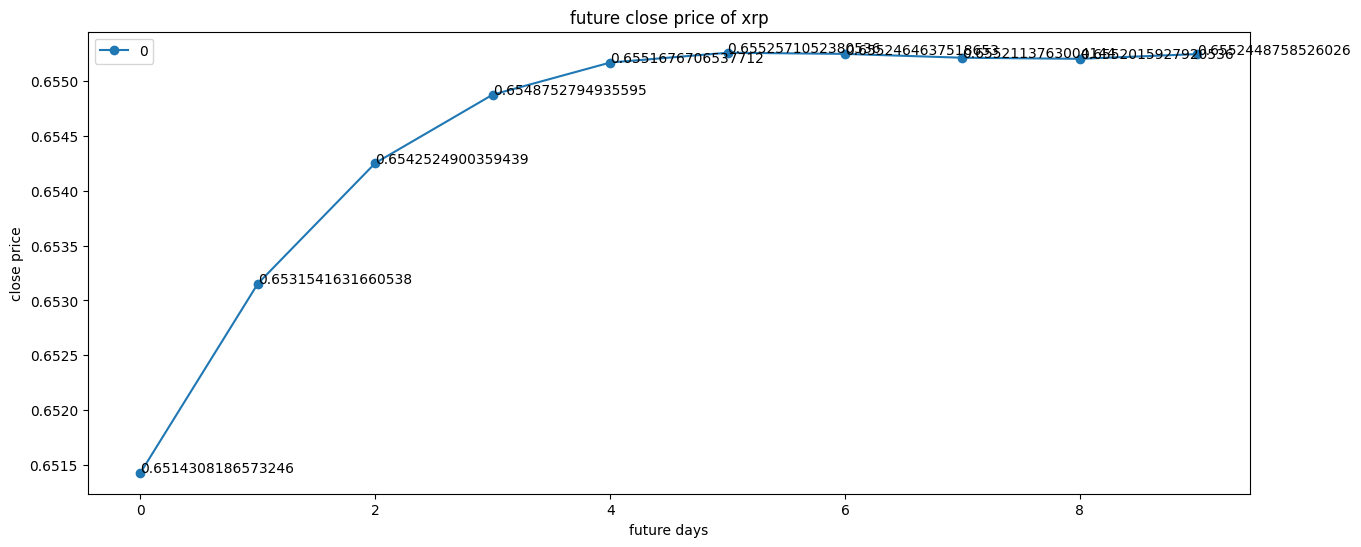

In [33]:
future_results = np.array(future_results).reshape(-1, 1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15, 6), marker='o')
for i in range(len(future_results)):
    plt.text(i, future_results[i], str(future_results[i][0]))
plt.xlabel('future days')
plt.ylabel('close price')
plt.title('future close price of xrp')

In [34]:
model.save('xrp_price_model.keras')